In [69]:
import pandas as pd
import numpy as np
df = pd.read_csv("CS105Fall2022.csv")

df = df.iloc[:, 74:78]
df = df.rename(columns={'74. How many hours do you play video games in an average week? (PC, console, phone...)': 'HourPlayed', '75. How many hours do you spend watching gaming streams in a week?': 'HourWatched', '76. What genre of games do you play? (Select all that apply)': 'Genre', '77. What is the name of the game you play most?': 'PlayMost'})
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(to_replace=r'[^\d.]+', value='', regex=True)
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(to_replace='', value=0)
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(np.nan, 0)
df.iloc[:, 2:3] = df.iloc[:, 2:3].fillna('None')

# df = df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'77. What is the name of the game you play most?']
# df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'] = df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'].replace(to_replace=r'[^\d.]+', value='', regex=True)
# df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'] = df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'].replace(np.nan, 0)

df.head(20)

,HourPlayed,HourWatched,Genre,PlayMost
0,15,10,"FPS, Fighting Games, Gatcha, Single Player Gam...",APEX LEGENDS
1,0,0,None,NaN
2,20,0,"Gatcha, Single Player Games, RTS, Phone Games",Azur Lane
3,20,8,"FPS, Fighting Games, Gatcha, Single Player Gam...",Tower of Fantasy
4,0,0,None,NaN
5,0,0,None,NaN
6,0,0,None,Na
7,3,0,MOBA,League of Legends
8,0,0,Phone Games,Wordle
9,5,0,Phone Games,Sumikko Farm


hypothesis: younger college students spend more time on video games

In [70]:
age_df = pd.read_csv('CS105Fall2022(Responses).csv')
age_df = age_df.iloc[:, 2:3]
age_df = age_df.rename(columns={'2. What is your age?' : 'age'})
age_df = pd.concat([age_df, df], axis=1)
age_df = age_df.iloc[:, 0:3]
df['HourPlayed'] = df['HourPlayed'].astype(float)
df['HourWatched'] = df['HourWatched'].astype(float)
#combine data set from responses, and compare with HourPlayed and HourWatched

In [71]:
age_df.iloc[47:48,0:1] = age_df.iloc[47:48,0:1].replace('18-21','20')
# I dont know how to deal with 18-21 so i just take 20 from the average 19.5

In [72]:
age_df.iloc[:, 0:3] = age_df.iloc[:, 0:3].replace(np.nan, 0)
age_df['age'] = age_df['age'].astype(float)
age_df['HourWatched'] = age_df['HourWatched'].astype(float)
age_df['HourPlayed'] = age_df['HourPlayed'].astype(float)
age_df

,age,HourPlayed,HourWatched
0,22.0,15.0,10.0
1,22.0,0.0,0.0
2,27.0,20.0,0.0
3,24.0,20.0,8.0
4,40.0,0.0,0.0
...,...,...,...
106,23.0,5.0,0.0
107,19.0,30.0,4.0
108,21.0,28.0,2.0
109,19.0,20.0,1.0


In [73]:
new_age_df = age_df.set_index('age')   #making age as index
new_age_df

,HourPlayed,HourWatched
age,,
22.0,15.0,10.0
22.0,0.0,0.0
27.0,20.0,0.0
24.0,20.0,8.0
40.0,0.0,0.0
...,...,...
23.0,5.0,0.0
19.0,30.0,4.0
21.0,28.0,2.0


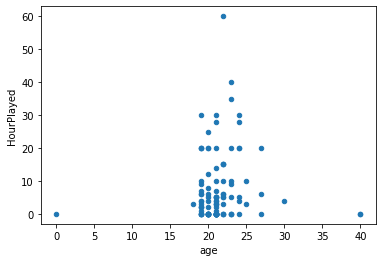

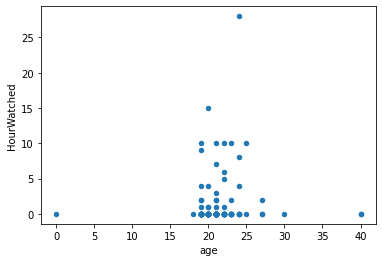

In [74]:
age_df.plot.scatter(x="age", y = "HourPlayed")
age_df.plot.scatter(x="age", y = "HourWatched")

By oberserving the previous graph, we can see that most of the dot are concentrate between age 18-24. They look like that age is directly related to HourWatched and HourPlayed, but since our data set is taken among 3 cs classes and we are mostly 18-24 years old so the case does not work as they have shown.

In [75]:
h = age_df[["age","HourPlayed","HourWatched"]].corr()
h

,age,HourPlayed,HourWatched
age,1.000000,0.05706,0.051881
HourPlayed,0.057060,1.00000,0.434180
HourWatched,0.051881,0.43418,1.000000


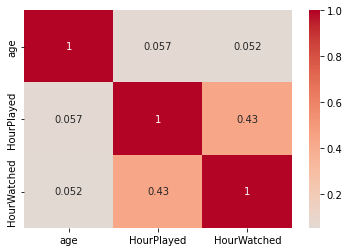

In [76]:
import seaborn as sns
sns.heatmap(h,center=0, cmap = "coolwarm", annot=True)

We can see the corrlations between age and HourWatch, HourPlayed are around 0.05, which indicates a week positive relationship. 

Conducting Chi-Squared Test on Data

The chi-squared test is a hypothesis test used to determine whether there is any significant association between two catergorical variables in the data. In our case, we would like to see if there is any significance between HourWatched and HourPlayed. Before we can proceed into testing, we must first develop our two hypothesis:

H0: There is no relationship between the two variables, and our data is independent

H1: There is a relationship between the two variables, and our data is dependent on the other.

In [77]:
age_df

,age,HourPlayed,HourWatched
0,22.0,15.0,10.0
1,22.0,0.0,0.0
2,27.0,20.0,0.0
3,24.0,20.0,8.0
4,40.0,0.0,0.0
...,...,...,...
106,23.0,5.0,0.0
107,19.0,30.0,4.0
108,21.0,28.0,2.0
109,19.0,20.0,1.0


In [78]:
Playhours_count = age_df.iloc[:,0:2] #chi-square on HourPlayed and age
Playhours_count.loc['col_total'] = Playhours_count.sum(axis=0)
Playhours_count['row_total'] = Playhours_count.sum(axis=1)
Playhours_count

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,HourPlayed,row_total
0,22.0,15.0,37.0
1,22.0,0.0,22.0
2,27.0,20.0,47.0
3,24.0,20.0,44.0
4,40.0,0.0,40.0
...,...,...,...
107,19.0,30.0,49.0
108,21.0,28.0,49.0
109,19.0,20.0,39.0
110,23.0,0.0,23.0


In [79]:
expectPlayHour = np.outer(Playhours_count["row_total"][0:111], Playhours_count.loc["col_total"][0:2]) / 3180
expectedPlayHour = pd.DataFrame(expectPlayHour)
expectedPlayHour.columns = ['age','HourPlayed']
expectedPlayHour

,age,HourPlayed
0,27.587107,9.412893
1,16.403145,5.596855
2,35.043082,11.956918
3,32.806289,11.193711
4,29.823899,10.176101
...,...,...
106,20.876730,7.123270
107,36.534277,12.465723
108,36.534277,12.465723
109,29.078302,9.921698


In [80]:
chi_squared_stat1 = (((age_df - expectedPlayHour)**2)/expectedPlayHour).sum().sum()
chi_squared_stat1

836.0108166705122

In [81]:
from scipy.stats import chi2

critical_value = chi2.ppf(q=0.999, df=110)
print("Critical Value:",critical_value)

p_value = 1 - (chi2.cdf(x=chi_squared_stat1, df=110))
print("P Value:", p_value)

Critical Value: 161.58073982908158
P Value: 0.0


In [82]:
Watchhours_count = age_df.loc[:,('age','HourWatched')] #chi-square on HourWatch and age
Watchhours_count.loc['col_total'] = Watchhours_count.sum(axis=0)
Watchhours_count['row_total'] = Watchhours_count.sum(axis=1)
Watchhours_count

,age,HourWatched,row_total
0,22.0,10.0,32.0
1,22.0,0.0,22.0
2,27.0,0.0,27.0
3,24.0,8.0,32.0
4,40.0,0.0,40.0
...,...,...,...
107,19.0,4.0,23.0
108,21.0,2.0,23.0
109,19.0,1.0,20.0
110,23.0,0.0,23.0


In [83]:
expectWatchHour = np.outer(Watchhours_count["row_total"][0:111], Watchhours_count.loc["col_total"][0:2]) / 2531
expectedWatchHour = pd.DataFrame(expectWatchHour)
expectedWatchHour.columns = ['age','HourWatched']
expectedWatchHour

,age,HourWatched
0,29.977084,2.022916
1,20.609245,1.390755
2,25.293165,1.706835
3,29.977084,2.022916
4,37.471355,2.528645
...,...,...
106,21.546029,1.453971
107,21.546029,1.453971
108,21.546029,1.453971
109,18.735678,1.264322


Creating Chi-Squared Statistic

After calculating our expected table, we can then calculate the chi-square static value with the below formula.

In [84]:
chi_squared_stat2 = (((age_df - expectedWatchHour)**2) / expectedWatchHour).sum().sum()
chi_squared_stat2

667.0326557117743

In [85]:
from scipy.stats import chi2

critical_value = chi2.ppf(q=0.999, df=110)
print("Critical Value:",critical_value)

p_value = 1 - (chi2.cdf(x=chi_squared_stat2, df=110))
print("P Value:", p_value)

Critical Value: 161.58073982908158
P Value: 0.0


since both of the p value from test Age to HourWatch and test Age to HourPlayed are 0, which indicates that we should reject the null hypothesis. Age is independent to HourWatched and HourPlayed